a.  Equation of Capital market line  
b.  Capital market point  
c.  Market Portfolio  
d.  Equation of Security market line  
e.  Beta of each asset  

In [62]:
import pandas as pd
import numpy as np

num_assets = 50 # number of assets
capital = 100000 # capital to invest

cov_matrix = pd.read_excel('omf_all_data.xlsx', sheet_name='Covariance Matrix', index_col=0)
# fill the upper triangle of the covariance matrix
covariance_matrix = cov_matrix.fillna(cov_matrix.T)
covariance_matrix = covariance_matrix.values

# matrix of 1s
e = np.array([[1] for _ in range(num_assets)])

# expected rate of return
mu = pd.read_excel('omf_all_data.xlsx', sheet_name='Expected rate of return, E(ri)', index_col=0)
mu = mu.values
mu = mu.T

In [63]:
# risk-free rate
mu_rf = 0.0003 # 0.03%

- Market Portfolio

In [64]:
# Calculating market portfolio
# inverse of covariance matrix
inv_cov_matrix = np.linalg.inv(covariance_matrix)
# market portfolio weights
w_mt = np.dot(inv_cov_matrix, (mu - mu_rf * e)) / np.dot(np.dot(e.T, inv_cov_matrix), (mu - mu_rf * e))

In [65]:
sigma_mt = np.sqrt(np.dot(np.dot(w_mt.T, covariance_matrix), w_mt))[0][0]
mu_mt = np.dot(w_mt.T, mu)[0][0]

print('Expected rate of return of market portfolio:', mu_mt)
print('Standard deviation of market portfolio:', sigma_mt)

Expected rate of return of market portfolio: 0.011446353786125978
Standard deviation of market portfolio: 0.030735756082217944


In [66]:
# vary R from 0 to 0.1
returns = []
risks = []

for R in np.arange(-0.01, 0.05, 0.0001):
    muTsigmainverseE = np.dot(np.dot(mu.T, np.linalg.inv(covariance_matrix)), e)[0]
    eTsigmainverseE = np.dot(np.dot(e.T, np.linalg.inv(covariance_matrix)), e)
    muTsigmainverseMu = np.dot(np.dot(mu.T, np.linalg.inv(covariance_matrix)), mu)[0]
    eTsigmainverseMu = np.dot(np.dot(e.T, np.linalg.inv(covariance_matrix)), mu)[0]

    # v1 = det([[2R, muTsigmainverseE],[2, eTsigmainverseE]]) / det([[muTsigmainverseE, muTsigmainverseE],[eTsigmainverseMu, eTsigmainverseE]])
    # v2 = det([[muTsigmainverseMu, 2R],[eTsigmainverseMu, 2]]) / det([[muTsigmainverseMu, muTsigmainverseE],[eTsigmainverseMu, eTsigmainverseE]])

    v1 = (2*R*eTsigmainverseE - 2*muTsigmainverseE) / (muTsigmainverseMu*eTsigmainverseE - muTsigmainverseE*eTsigmainverseMu)
    #v1 = np.linalg.det([[2*R, muTsigmainverseE],[2, eTsigmainverseE]]) / np.linalg.det([[muTsigmainverseE, muTsigmainverseE],[eTsigmainverseMu, eTsigmainverseE]])
    v2 = (muTsigmainverseMu*2 - 2*R*eTsigmainverseMu) / (muTsigmainverseMu*eTsigmainverseE - muTsigmainverseE*eTsigmainverseMu)

    optimal_portfolio_3 = (v1[0] * np.dot(np.linalg.inv(covariance_matrix), mu) + v2[0] * np.dot(np.linalg.inv(covariance_matrix), e))/2

    # Expected Returns
    returns.append(np.dot(mu.T, optimal_portfolio_3)[0][0])
    # print('Expected Returns:', expected_returns_3)

    # Standard Deviation Risk
    risks.append(np.sqrt(np.dot(np.dot(optimal_portfolio_3.T, covariance_matrix), optimal_portfolio_3)[0][0]))

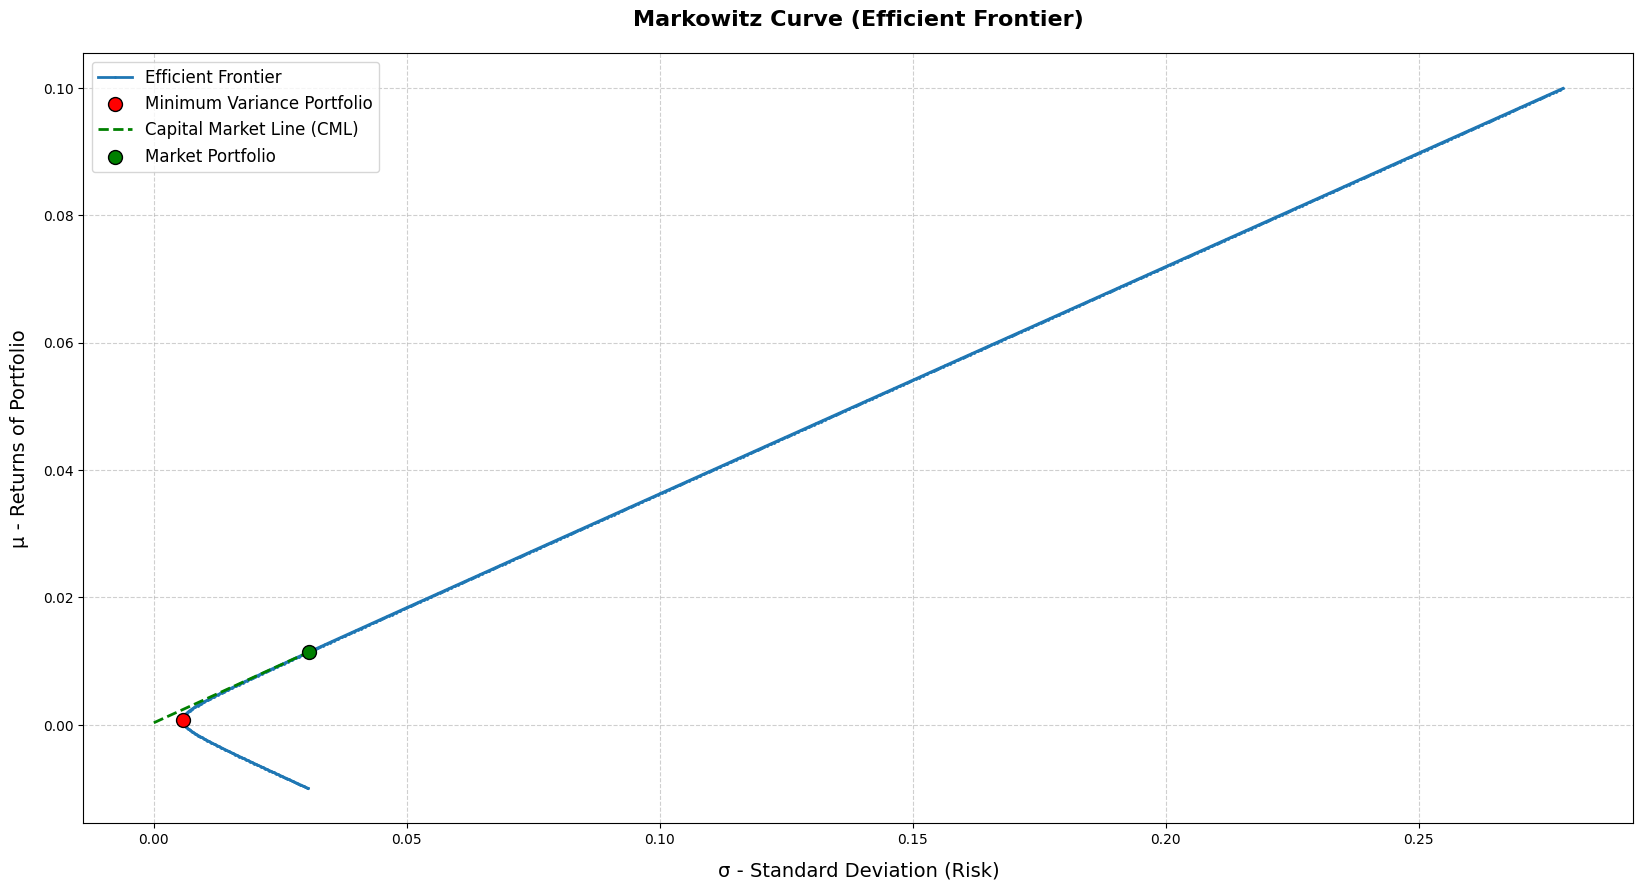

Minimum Variance Portfolio: 0.005694664020986979 0.0006999999999999353
Market Portfolio: 0.030735756082217944 0.011446353786125978


In [73]:
# Plot the Markowitz Curve (Efficient Frontier)
import matplotlib.pyplot as plt

# Plot risks and returns
plt.figure(figsize=(20, 10))
plt.plot(risks, returns, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=1, label='Efficient Frontier')

# Mark the minimum variance portfolio
min_risk = min(risks)
min_risk_idx = risks.index(min_risk)
plt.scatter(min_risk, returns[min_risk_idx], color='red', s=100, edgecolor='black', zorder=5, label='Minimum Variance Portfolio')
#plt.text(min_risk + 0.0005, returns[min_risk_idx] - 0.0005, 'Minimum Variance Portfolio', fontsize=12, ha='left', color='red')

# Connect the market portfolio point to risk-free rate
plt.plot([0, sigma_mt], [mu_rf, mu_mt], linestyle='--', color='green', linewidth=2, label='Capital Market Line (CML)')

# Mark the market portfolio
plt.scatter(sigma_mt, mu_mt, color='green', s=100, edgecolor='black', zorder=5, label='Market Portfolio')

# Add labels and title with improved font settings
plt.xlabel('σ - Standard Deviation (Risk)', fontsize=14, labelpad=10)
plt.ylabel('μ - Returns of Portfolio', fontsize=14, labelpad=10)
plt.title('Markowitz Curve (Efficient Frontier)', fontsize=16, fontweight='bold', pad=20)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', fontsize=12)

# plt.xlim(0, 0.05)
# plt.ylim(0, 0.02)

# Show plot
plt.show();

# Output the minimum variance portfolio
print('Minimum Variance Portfolio:', min_risk, returns[min_risk_idx])
# Output the market portfolio
print('Market Portfolio:', sigma_mt, mu_mt)